<a href="https://colab.research.google.com/github/jpabonl/Mecanica_cuantica_I/blob/main/Taller_3_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Taller#3 Mecanica cuántica***

---



 Sabiendo que el algoritmo de Numerov tiene la forma


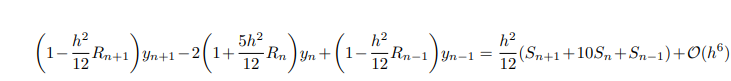

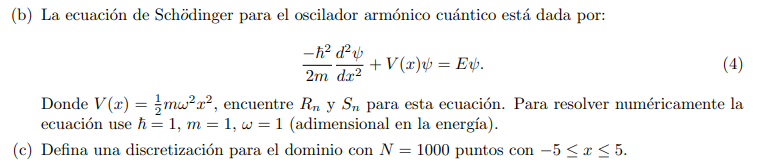

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#Constantes
hbar=1
m=1
w=1
n_puntos=1000
x = np.linspace(-5,5, 1000)
val = (x[-1] - x[0]) / (n_puntos - 1)

image.png

In [38]:
#Función para calcular el potencial
def calculo_potencial(x):
  potencial=1/2*(m*w**2*x**2)
  return potencial
def R(x, E, f):
  return 2*(f(x)-E)

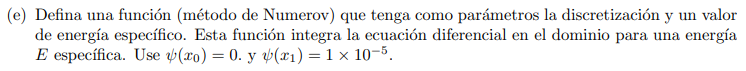

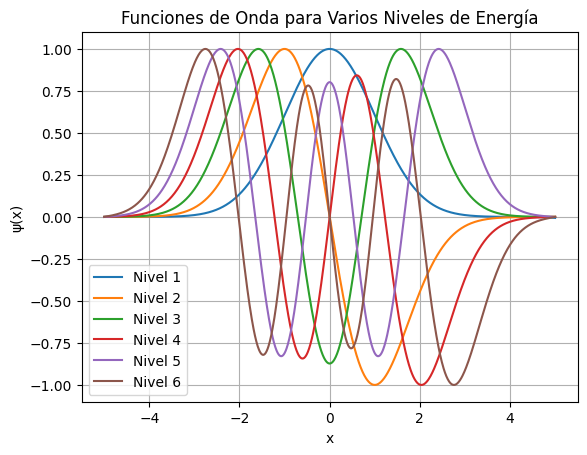

In [40]:
def numerov(x, E, f, h=hval):
    N = len(x)
    psi = np.zeros(N)
    psi[0] = 0
    psi[1] = 1e-5

    for i in range(2, N):
        num = 2 * (1 + (R(x[i-1], E, f) * 5 * h**2) / 12) * psi[i-1] - (1 - (R(x[i-2], E, f) * h**2) / 12) * psi[i-2]
        den = 1 - (R(x[i], E, f) * h**2) / 12
        psi[i] = num / den

    return psi / max(psi)

def valores_propios(E, f):
    dE = 0.001
    P1 = numerov(x, E, f)[-1]
    E = E + dE
    while abs(dE) > 1e-7:
        P2 = numerov(x, E, f)[-1]
        if P1 * P2 < 0:
            dE = -dE / 2
        E = E + dE
        P1 = P2
    return E

Ei = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

niveles_energia = []
for E_inicial in Ei:
    nivel = valores_propios(E_inicial, calculo_potencial)
    niveles_energia.append(nivel)

plt.figure()
plt.title("Funciones de Onda para Varios Niveles de Energía")
plt.xlabel("x")
plt.ylabel("ψ(x)")

for i, nivel in enumerate(niveles_energia):
    psi_nivel = numerov(x, nivel, calculo_potencial)
    plt.plot(x, psi_nivel, label=f"Nivel {i+1}")

plt.legend()
plt.grid(True)
plt.show()

# **Potencial gausiano**



>  $V(x)=-10 e^{-x^{2}/20}$


---

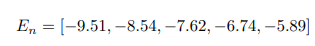



In [41]:
def calculo_potencial(x):
    potencial = -10 * np.exp(-x**2 / 20)
    return potencial

# Encontrar los primeros cinco estados ligados (En < 0)
estados_ligados = []
E_inicial = -10.0  # Energía inicial
while len(estados_ligados) < 5:
    nivel = valores_propios(E_inicial, calculo_potencial)
    if nivel < 0:
        estados_ligados.append(nivel)
    E_inicial += 1.0

# Encontrar los estados propios del operador de energía
estados_propios_energia = []
for E in estados_ligados:
    nivel = valores_propios(E, calculo_potencial)
    estados_propios_energia.append(nivel)

# Mostrar los resultados
for i, nivel in enumerate(estados_ligados):
    print(f"Estado Ligado {i+1}: E = {nivel:.5f}")


Estado Ligado 1: E = -9.50939
Estado Ligado 2: E = -8.54738
Estado Ligado 3: E = -7.62426
Estado Ligado 4: E = -6.74105
Estado Ligado 5: E = -5.89842


# **Potencial Racional**


> $V(x)=-\frac{4}{(1+x^{2})^{2}}$


---






In [52]:
def calculo_potencial(x):
    potencial = -4 / (1 + x**2)**2
    return potencial


# Encontrar los primeros cinco estados ligados (En < 0)
estados_ligados = []
E_inicial = -5.0  # Energía inicial
while len(estados_ligados) < 2:
    nivel = valores_propios(E_inicial, calculo_potencial)
    if nivel < 0:
        estados_ligados.append(nivel)
    E_inicial += 0.5

# Encontrar los estados propios del operador de energía
estados_propios_energia = []
for E in estados_ligados:
    nivel = valores_propios(E, calculo_potencial)
    estados_propios_energia.append(nivel)

# Mostrar los resultados
for i, nivel in enumerate(estados_ligados):
    print(f"Estado Ligado {i+1}: E = {nivel+1:.3f}")



Estado Ligado 1: E = -1.471
Estado Ligado 2: E = -1.471
